## 1. Import necessasary libraries

In [106]:
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## 2. Import Data

In [107]:
delivery_time = pd.read_csv('delivery_time.csv')
delivery_time

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


## 3. Data Understanding

### 3.1 Initial Analysis

In [108]:
delivery_time.shape

(21, 2)

In [109]:
delivery_time.isna().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [110]:
delivery_time.dtypes

Delivery Time    float64
Sorting Time       int64
dtype: object

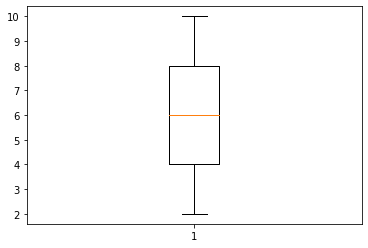

In [111]:
plt.boxplot(x = 'Sorting Time', data = delivery_time)
plt.show()

### 3.2 Assumptions check

#### 1. Linearity Test

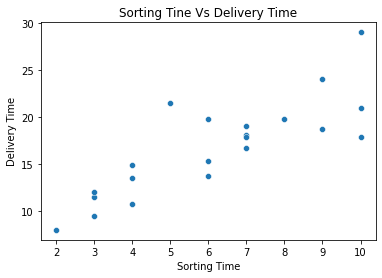

In [112]:
sns.scatterplot(x= 'Sorting Time', y = 'Delivery Time', data = delivery_time)
plt.title('Sorting Tine Vs Delivery Time')
plt.show()

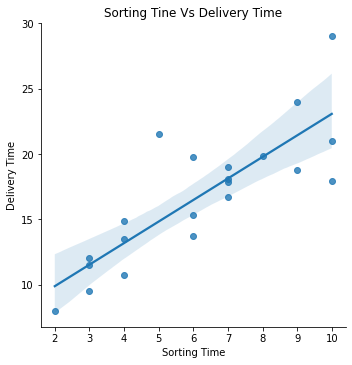

In [113]:
sns.lmplot(x= 'Sorting Time', y = 'Delivery Time', data = delivery_time)
plt.title('Sorting Tine Vs Delivery Time')
plt.show()

### 2. Normality Test

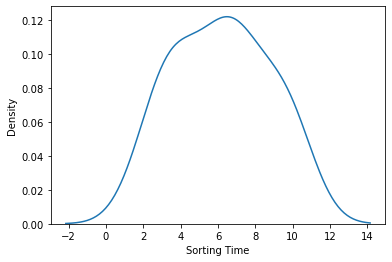

In [114]:
sns.distplot(a = delivery_time['Sorting Time'], hist = False)
plt.show()

In [115]:
delivery_time['Sorting Time'].skew()

0.047115474210530174

## 3. MultiCollinearity Check

### No dependent variable so no multicorealtion

## 4. No Autoregression

### There is no time based input feature

## 4. Data Preparation

In [116]:
delivery_time.rename(columns={'Delivery Time' : 'Delivery' ,'Sorting Time' : 'Sorting'},inplace=True)

In [117]:
delivery_time

,Delivery,Sorting
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


## 5. Model Building | 6. Model Training

In [118]:
import statsmodels.formula.api as smf

In [119]:
delivery_time_model = smf.ols(formula = 'Delivery ~ Sorting', data = delivery_time).fit()
delivery_time_model

In [120]:
delivery_time_model.params

Intercept    6.582734
Sorting      1.649020
dtype: float64

## 7. Model Testing

In [121]:
x_test =  pd.DataFrame(data={'Sorting':[4,8,6,7,2,9,5,4,11,10,15,20]})
x_test

,Sorting
0,4
1,8
2,6
3,7
4,2
5,9
6,5
7,4
8,11
9,10


In [122]:
delivery_time_model.predict(x_test)

0     13.178814
1     19.774893
2     16.476853
3     18.125873
4      9.880774
5     21.423913
6     14.827833
7     13.178814
8     24.721953
9     23.072933
10    31.318032
11    39.563132
dtype: float64

## 8. Model Evaluaton

In [123]:
print('R-square                           : ',round(delivery_time_model.rsquared,4))
print('Adjusted R-square                  : ',round(delivery_time_model.rsquared_adj,4))
print('Akaike information criterion (AIC) : ',round(delivery_time_model.aic,4))
print('Bayesian information criterion(BIC): ',round(delivery_time_model.bic,4))

R-square                           :  0.6823
Adjusted R-square                  :  0.6655
Akaike information criterion (AIC) :  106.714
Bayesian information criterion(BIC):  108.803


In [124]:
x_test = delivery_time['Sorting']
x_test

0     10
1      4
2      6
3      9
4     10
5      6
6      7
7      3
8     10
9      9
10     8
11     4
12     7
13     3
14     3
15     4
16     6
17     7
18     2
19     7
20     5
Name: Sorting, dtype: int64

In [125]:
y_test = delivery_time_model.predict(x_test)
y_test

0     23.072933
1     13.178814
2     16.476853
3     21.423913
4     23.072933
5     16.476853
6     18.125873
7     11.529794
8     23.072933
9     21.423913
10    19.774893
11    13.178814
12    18.125873
13    11.529794
14    11.529794
15    13.178814
16    16.476853
17    18.125873
18     9.880774
19    18.125873
20    14.827833
dtype: float64

In [126]:
error = delivery_time['Delivery'] - y_test
error

0    -2.072933
1     0.321186
2     3.273147
3     2.576087
4     5.927067
5    -1.126853
6     0.874127
7    -2.029794
8    -5.172933
9    -2.673913
10    0.055107
11   -2.428814
12   -1.445873
13   -0.029794
14    0.500206
15    1.701186
16   -2.726853
17   -0.015873
18   -1.880774
19   -0.295873
20    6.672167
dtype: float64

In [127]:
mean_error = error.mean()
mean_error

-1.2688263138573218e-15

## Homoscedasticity Check

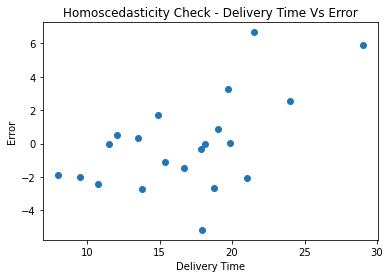

In [128]:
plt.scatter(x = delivery_time['Delivery'],y = error)
plt.title('Homoscedasticity Check - Delivery Time Vs Error')
plt.xlabel('Delivery Time')
plt.ylabel('Error')
plt.show()

###  Zero Residual Mean Test

It is a plot between **Actual Output Vs Predicted Plot**.

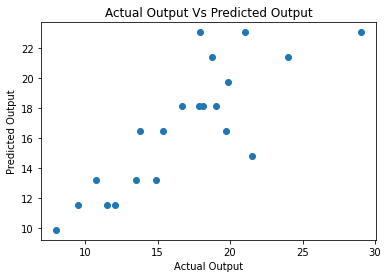

In [129]:
plt.scatter(x = delivery_time['Delivery'],y = y_test)
plt.title('Actual Output Vs Predicted Output')
plt.xlabel('Actual Output')
plt.ylabel('Predicted Output')
plt.show()

# 9. Model Deployment

In [130]:
from pickle import dump

In [131]:
dump(delivery_time_model, open('delivery_time_model.pkl','wb'))

In [132]:
from pickle import load

In [133]:
loaded_intell_file = load(open('delivery_time_model.pkl','rb'))

In [134]:
y_pred_new_sample = loaded_intell_file.predict(x_test)
y_pred_new_sample

0     23.072933
1     13.178814
2     16.476853
3     21.423913
4     23.072933
5     16.476853
6     18.125873
7     11.529794
8     23.072933
9     21.423913
10    19.774893
11    13.178814
12    18.125873
13    11.529794
14    11.529794
15    13.178814
16    16.476853
17    18.125873
18     9.880774
19    18.125873
20    14.827833
dtype: float64

# ===================================================

# Model Bulding using Data transformation techniques

### Standard scaler transformation

In [135]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

## Data Preperation

In [136]:
x = delivery_time[['Sorting']]
y = delivery_time[['Delivery']]

In [137]:
x.shape,y.shape

((21, 1), (21, 1))

In [138]:
transformed_delivery_time = StandardScaler()

In [139]:
transformed_delivery_time = transformed_delivery_time.fit_transform(x)

In [140]:
transformed_delivery_time

array([[ 1.53562462],
       [-0.88298415],
       [-0.07678123],
       [ 1.13252315],
       [ 1.53562462],
       [-0.07678123],
       [ 0.32632023],
       [-1.28608562],
       [ 1.53562462],
       [ 1.13252315],
       [ 0.72942169],
       [-0.88298415],
       [ 0.32632023],
       [-1.28608562],
       [-1.28608562],
       [-0.88298415],
       [-0.07678123],
       [ 0.32632023],
       [-1.68918708],
       [ 0.32632023],
       [-0.47988269]])

In [141]:
delivery_time.columns

Index(['Delivery', 'Sorting'], dtype='object')

In [142]:
transformed_delivery_time = pd.DataFrame(data=transformed_delivery_time,columns=['Sorting'])
transformed_delivery_time

,Sorting
0,1.535625
1,-0.882984
2,-0.076781
3,1.132523
4,1.535625
5,-0.076781
6,0.326320
7,-1.286086
8,1.535625
9,1.132523


In [143]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20,random_state=12)

##  Model Training and Model Building

In [144]:
from sklearn.linear_model import LinearRegression

In [145]:
linear_model = LinearRegression()
linear_model.fit(x,y)

LinearRegression()

In [146]:
linear_model.intercept_

array([6.58273397])

In [147]:
linear_model.coef_

array([[1.6490199]])

## Model Testing 

In [148]:
y_pred = linear_model.predict(x_train)
y_pred

array([[23.07293294],
       [11.52979366],
       [13.17881356],
       [ 9.88077377],
       [16.47685335],
       [23.07293294],
       [13.17881356],
       [18.12587325],
       [23.07293294],
       [18.12587325],
       [16.47685335],
       [21.42391304],
       [16.47685335],
       [18.12587325],
       [18.12587325],
       [13.17881356]])

In [149]:
error = y_train - y_pred
error

,Delivery
8,-5.172933
14,0.500206
15,1.701186
18,-1.880774
5,-1.126853
4,5.927067
1,0.321186
19,-0.295873
0,-2.072933
12,-1.445873


## Homoscedasticity Check

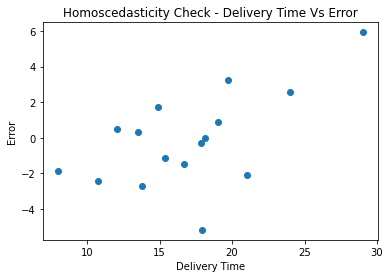

In [150]:
plt.scatter(x = y_train,y = error)
plt.title('Homoscedasticity Check - Delivery Time Vs Error')
plt.xlabel('Delivery Time')
plt.ylabel('Error')
plt.show()

### 6. Zero Residual Mean Test

It is a plot between **Actual Output Vs Predicted Plot**.

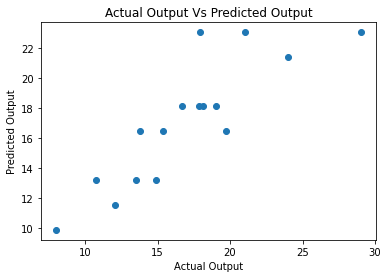

In [151]:
plt.scatter(x = y_train ,y = y_pred)
plt.title('Actual Output Vs Predicted Output')
plt.xlabel('Actual Output')
plt.ylabel('Predicted Output')
plt.show()

## Model Evaluation

In [152]:
y_test_pred = linear_model.predict(x_test)

In [153]:
y_test_pred

array([[11.52979366],
       [21.42391304],
       [19.77489315],
       [14.82783346],
       [11.52979366]])

# Model Deployment

In [154]:
from pickle import dump

In [155]:
dump(linear_model, open('linear_model.pkl','wb'))

In [156]:
from pickle import load

In [157]:
loaded_intell_file = load(open('linear_model.pkl','rb'))

In [159]:
y_pred_new_sample = loaded_intell_file.predict(x_test)
y_pred_new_sample

array([[11.52979366],
       [21.42391304],
       [19.77489315],
       [14.82783346],
       [11.52979366]])